In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/var/folders/rd/001y7gzj60q74tv8n4b4pjlr0000gn/T/ipykernel_1192/986877276.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
date = pd.read_csv("BTC_v4.csv", sep = ";")

date = date.sort_values(by=['Date'])
date['Date'] = pd.to_datetime(date["Date"]).dt.date

date = date.loc[pd.to_datetime(date['Date']) > '2015-01-01']

date = date.reset_index()

date = date.drop('index', axis = 1)

date = date.dropna()

print(date)

            Date         Price        Volume    Market_cap  No_adresses
0     2015-01-02    314.446000  3.885591e+07  4.301448e+09       184462
1     2015-01-03    286.572000  1.187789e+08  3.921358e+09       216194
2     2015-01-04    260.936000  2.055001e+08  3.571640e+09       209509
3     2015-01-05    273.220000  1.550381e+08  3.740880e+09       208147
4     2015-01-06    285.373800  9.700290e+07  3.908408e+09       181346
...          ...           ...           ...           ...          ...
3265  2024-01-04  44229.781865  1.404458e+10  8.643705e+11       905275
3266  2024-01-05  44162.479144  1.523431e+10  8.630552e+11       772203
3267  2024-01-06  43994.009813  5.950649e+09  8.597628e+11       712789
3268  2024-01-07  43922.609244  7.287310e+09  8.583675e+11       612667
3269  2024-01-08  46932.477244  2.078956e+10  9.171885e+11       662165

[3270 rows x 5 columns]


/var/folders/rd/001y7gzj60q74tv8n4b4pjlr0000gn/T/ipykernel_1192/406862113.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date['Date'] = pd.to_datetime(date["Date"]).dt.date


In [3]:
date['logprice'] = np.log(date['Price'])
date['logvolume'] = np.log(date['Volume'])
date['logreturn'] = date['logprice'] - date['logprice'].shift(1)
date['logmarketcap'] = np.log(date['Market_cap'])
date['logusers'] = np.log(date['No_adresses'])
date['lag_logusers'] = date['logusers'].shift(1)
#date['logwallets'] = np.log(date['wallets'])
date['ch_users'] = date['logusers'] - date['lag_logusers']

In [4]:
date

,Date,Price,Volume,Market_cap,No_adresses,logprice,logvolume,logreturn,logmarketcap,logusers,lag_logusers,ch_users
0,2015-01-02,314.446000,3.885591e+07,4.301448e+09,184462,5.750812,17.475371,NaN,22.182218,12.125199,NaN,NaN
1,2015-01-03,286.572000,1.187789e+08,3.921358e+09,216194,5.657990,18.592775,-0.092823,22.089704,12.283931,12.125199,0.158733
2,2015-01-04,260.936000,2.055001e+08,3.571640e+09,209509,5.564275,19.140957,-0.093715,21.996291,12.252522,12.283931,-0.031409
3,2015-01-05,273.220000,1.550381e+08,3.740880e+09,208147,5.610277,18.859182,0.046002,22.042587,12.246000,12.252522,-0.006522
4,2015-01-06,285.373800,9.700290e+07,3.908408e+09,181346,5.653800,18.390251,0.043523,22.086396,12.108162,12.246000,-0.137838
...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2024-01-04,44229.781865,1.404458e+10,8.643705e+11,905275,10.697154,23.365502,0.031513,27.485267,13.715994,13.567353,0.148641
3266,2024-01-05,44162.479144,1.523431e+10,8.630552e+11,772203,10.695631,23.446816,-0.001523,27.483744,13.557003,13.715994,-0.158991
3267,2024-01-06,43994.009813,5.950649e+09,8.597628e+11,712789,10.691809,22.506766,-0.003822,27.479922,13.476941,13.557003,-0.080062
3268,2024-01-07,43922.609244,7.287310e+09,8.583675e+11,612667,10.690184,22.709400,-0.001624,27.478298,13.325577,13.476941,-0.151364


In [5]:
date = date.dropna()

In [6]:
date

,Date,Price,Volume,Market_cap,No_adresses,logprice,logvolume,logreturn,logmarketcap,logusers,lag_logusers,ch_users
1,2015-01-03,286.572000,1.187789e+08,3.921358e+09,216194,5.657990,18.592775,-0.092823,22.089704,12.283931,12.125199,0.158733
2,2015-01-04,260.936000,2.055001e+08,3.571640e+09,209509,5.564275,19.140957,-0.093715,21.996291,12.252522,12.283931,-0.031409
3,2015-01-05,273.220000,1.550381e+08,3.740880e+09,208147,5.610277,18.859182,0.046002,22.042587,12.246000,12.252522,-0.006522
4,2015-01-06,285.373800,9.700290e+07,3.908408e+09,181346,5.653800,18.390251,0.043523,22.086396,12.108162,12.246000,-0.137838
5,2015-01-07,295.872500,1.106742e+08,4.053239e+09,177697,5.689929,18.522102,0.036129,22.122782,12.087835,12.108162,-0.020327
...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2024-01-04,44229.781865,1.404458e+10,8.643705e+11,905275,10.697154,23.365502,0.031513,27.485267,13.715994,13.567353,0.148641
3266,2024-01-05,44162.479144,1.523431e+10,8.630552e+11,772203,10.695631,23.446816,-0.001523,27.483744,13.557003,13.715994,-0.158991
3267,2024-01-06,43994.009813,5.950649e+09,8.597628e+11,712789,10.691809,22.506766,-0.003822,27.479922,13.476941,13.557003,-0.080062
3268,2024-01-07,43922.609244,7.287310e+09,8.583675e+11,612667,10.690184,22.709400,-0.001624,27.478298,13.325577,13.476941,-0.151364


In [7]:
date.dtypes

Date             object
Price           float64
Volume          float64
Market_cap      float64
No_adresses       int64
logprice        float64
logvolume       float64
logreturn       float64
logmarketcap    float64
logusers        float64
lag_logusers    float64
ch_users        float64
dtype: object

In [8]:
def rolling_linear_regression(df, window_size):
    results = []
    for i in range(len(df) - window_size + 1):
        window = df.iloc[i:i+window_size]
        X = window[['logusers', 'logvolume']]
        Y = window['logmarketcap']
        model = LinearRegression().fit(X, Y)
        predictions = model.predict(X)
        mse = mean_squared_error(Y, predictions)
        results.append({'Start Date': window['Date'].iloc[0],
                        'End Date': window['Date'].iloc[-1],
                        'Intercept': model.intercept_,
                        'Coefficients': model.coef_,
                        'MSE': mse,
                        'Rsquared' : model.score(X, Y),
                        })
    return pd.DataFrame(results)


rolling_results = rolling_linear_regression(date, window_size=60)


print(rolling_results)

      Start Date    End Date  Intercept  \
0     2015-01-03  2015-03-04  22.168217   
1     2015-01-04  2015-03-05  22.179137   
2     2015-01-05  2015-03-06  22.343784   
3     2015-01-06  2015-03-07  22.347567   
4     2015-01-07  2015-03-08  21.894503   
...          ...         ...        ...   
3205  2023-11-06  2024-01-04  31.332642   
3206  2023-11-07  2024-01-05  31.277916   
3207  2023-11-08  2024-01-06  31.387150   
3208  2023-11-09  2024-01-07  31.279607   
3209  2023-11-10  2024-01-08  31.035900   

                                        Coefficients       MSE  Rsquared  
0     [-0.012307318727404468, -0.005292037556282826]  0.010971  0.000888  
1     [-0.009151337165388948, -0.008003335854035353]  0.010831  0.001481  
2      [-0.009551934172883967, -0.01660754170859902]  0.010997  0.005375  
3      [0.011154381220197903, -0.030589529284604462]  0.010988  0.016095  
4        [0.06287560547583614, -0.04052193113582871]  0.010705  0.031337  
...                              

In [9]:
rolling_results['t'] = rolling_results.index + 60

print(rolling_results)

results = pd.merge(date[['logusers', 'logvolume', 'Date']], rolling_results, left_index=True, right_index=True)

print(results)

      Start Date    End Date  Intercept  \
0     2015-01-03  2015-03-04  22.168217   
1     2015-01-04  2015-03-05  22.179137   
2     2015-01-05  2015-03-06  22.343784   
3     2015-01-06  2015-03-07  22.347567   
4     2015-01-07  2015-03-08  21.894503   
...          ...         ...        ...   
3205  2023-11-06  2024-01-04  31.332642   
3206  2023-11-07  2024-01-05  31.277916   
3207  2023-11-08  2024-01-06  31.387150   
3208  2023-11-09  2024-01-07  31.279607   
3209  2023-11-10  2024-01-08  31.035900   

                                        Coefficients       MSE  Rsquared     t  
0     [-0.012307318727404468, -0.005292037556282826]  0.010971  0.000888    60  
1     [-0.009151337165388948, -0.008003335854035353]  0.010831  0.001481    61  
2      [-0.009551934172883967, -0.01660754170859902]  0.010997  0.005375    62  
3      [0.011154381220197903, -0.030589529284604462]  0.010988  0.016095    63  
4        [0.06287560547583614, -0.04052193113582871]  0.010705  0.031337    64

In [10]:
results[['Beta', 'Gamma']] = results['Coefficients'].apply(pd.Series)

In [11]:
results

,logusers,logvolume,Date,Start Date,End Date,Intercept,Coefficients,MSE,Rsquared,t,Beta,Gamma
1,12.283931,18.592775,2015-01-03,2015-01-04,2015-03-05,22.179137,"[-0.009151337165388948, -0.008003335854035353]",0.010831,0.001481,61,-0.009151,-0.008003
2,12.252522,19.140957,2015-01-04,2015-01-05,2015-03-06,22.343784,"[-0.009551934172883967, -0.01660754170859902]",0.010997,0.005375,62,-0.009552,-0.016608
3,12.246000,18.859182,2015-01-05,2015-01-06,2015-03-07,22.347567,"[0.011154381220197903, -0.030589529284604462]",0.010988,0.016095,63,0.011154,-0.030590
4,12.108162,18.390251,2015-01-06,2015-01-07,2015-03-08,21.894503,"[0.06287560547583614, -0.04052193113582871]",0.010705,0.031337,64,0.062876,-0.040522
5,12.087835,18.522102,2015-01-07,2015-01-08,2015-03-09,21.271438,"[0.11869183485793848, -0.04394604844448336]",0.010520,0.044399,65,0.118692,-0.043946
...,...,...,...,...,...,...,...,...,...,...,...,...
3205,13.792322,22.498133,2023-11-05,2023-11-06,2024-01-04,31.332642,"[-0.36998603194791535, 0.04695411864005743]",0.003708,0.383638,3265,-0.369986,0.046954
3206,13.643970,22.554475,2023-11-06,2023-11-07,2024-01-05,31.277916,"[-0.363662809891278, 0.04571589045807938]",0.003634,0.377316,3266,-0.363663,0.045716
3207,13.622893,22.944223,2023-11-07,2023-11-08,2024-01-06,31.387150,"[-0.36417252586355453, 0.041397981697742794]",0.003515,0.379878,3267,-0.364173,0.041398
3208,13.706523,22.851411,2023-11-08,2023-11-09,2024-01-07,31.279607,"[-0.3537248333204255, 0.03996650482509042]",0.003425,0.376853,3268,-0.353725,0.039967


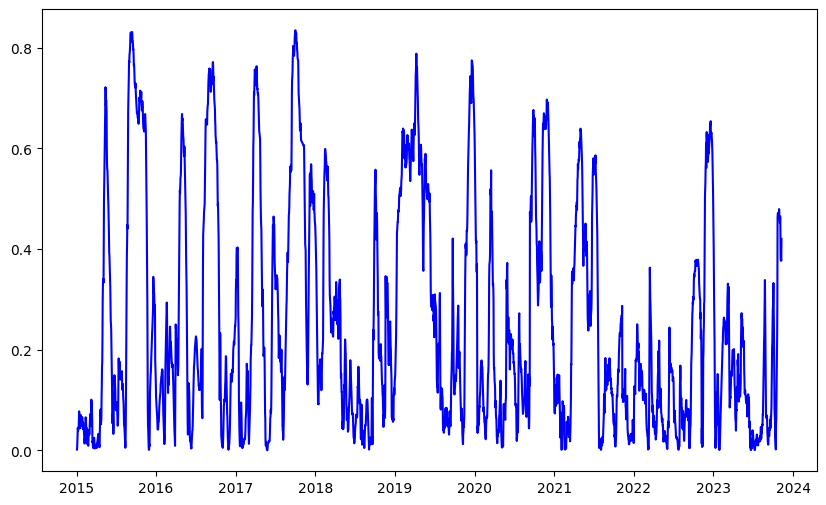

In [12]:
plt.figure(figsize=(10, 6))
#plt.locator_params(axis='x', nbins=2)
plt.plot(results['Date'], results['Rsquared'], label='R-Square', color = 'blue')
#plt.xlabel('Date')
#plt.ylabel('R-Square')
plt.show()



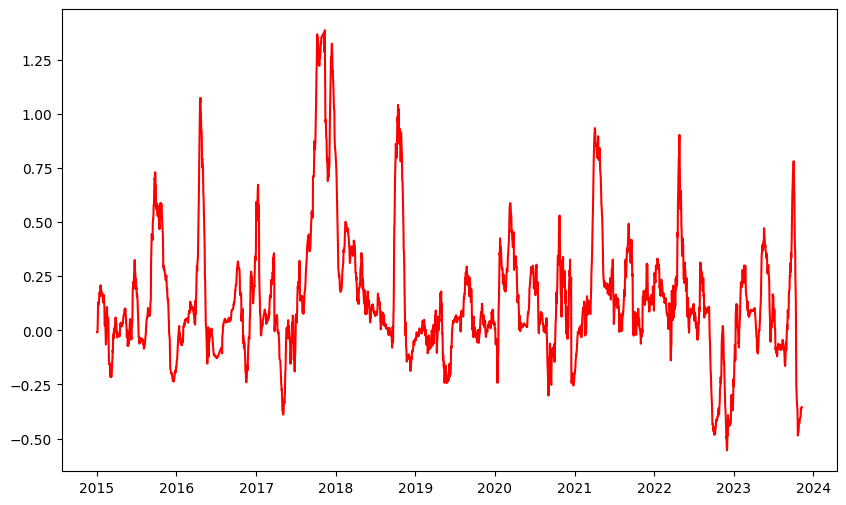

In [13]:
plt.figure(figsize=(10, 6))
#plt.locator_params(axis='x', nbins=2)
plt.plot(results['Date'], results['Beta'], label='Beta', color = 'red')
#plt.xlabel('Date')
#plt.ylabel('b1')
plt.show()

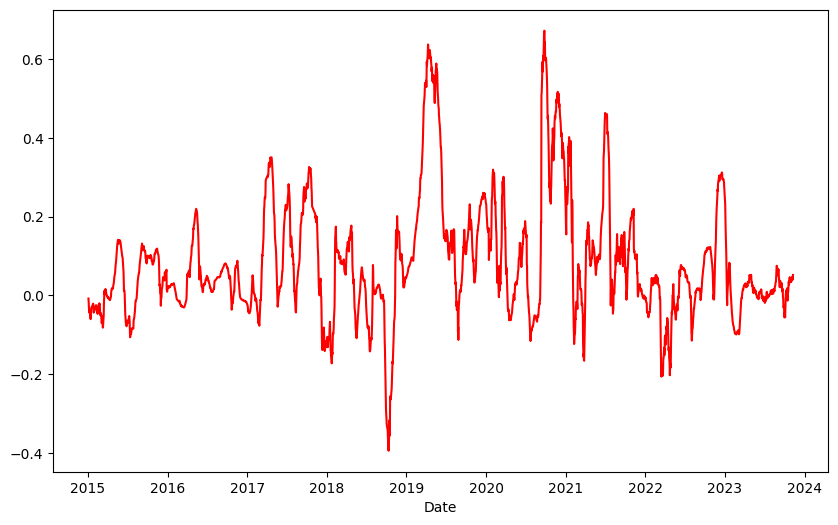

In [14]:
plt.figure(figsize=(10, 6))
plt.locator_params(axis='x', nbins=2)
plt.plot(results['Date'], results['Gamma'], label='Gamma', color = 'red')
plt.xlabel('Date')
# plt.ylabel('Gamma')
# plt.title('Rolling Beta Over Time')
# plt.legend()
plt.show()